In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Augmented Dataset with SDEs
# x : predicted_x_col_yearly0~8
# y : y_prediction_yearly
y = pd.read_csv("/content/drive/MyDrive/Graduate School/hack/y_prediction_yearly.csv", index_col = 0)
x0 = pd.read_csv("/content/drive/MyDrive/Graduate School/hack/predicted_x_col_yearly0.csv", index_col = 0)
x1 = pd.read_csv("/content/drive/MyDrive/Graduate School/hack/predicted_x_col_yearly1.csv", index_col = 0)
x2 = pd.read_csv("/content/drive/MyDrive/Graduate School/hack/predicted_x_col_yearly2.csv", index_col = 0)
x3 = pd.read_csv("/content/drive/MyDrive/Graduate School/hack/predicted_x_col_yearly3.csv", index_col = 0)
x4 = pd.read_csv("/content/drive/MyDrive/Graduate School/hack/predicted_x_col_yearly4.csv", index_col = 0)
x5 = pd.read_csv("/content/drive/MyDrive/Graduate School/hack/predicted_x_col_yearly5.csv", index_col = 0)
x6 = pd.read_csv("/content/drive/MyDrive/Graduate School/hack/predicted_x_col_yearly6.csv", index_col = 0)
x7 = pd.read_csv("/content/drive/MyDrive/Graduate School/hack/predicted_x_col_yearly7.csv", index_col = 0)
x8 = pd.read_csv("/content/drive/MyDrive/Graduate School/hack/predicted_x_col_yearly8.csv", index_col = 0)

Mounted at /content/drive


In [2]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 12.5 MB/

In [3]:
from pycaret.regression import *

In [8]:
# concat within same timestep t'
for i in range(y.shape[1]):
  globals()[f"data_time{i}"] = pd.concat([x0.iloc[:,i],x1.iloc[:,i],x2.iloc[:,i],
                                         x3.iloc[:,i],x4.iloc[:,i],x5.iloc[:,i],
                                         x6.iloc[:,i],x7.iloc[:,i],x8.iloc[:,i],
                                         y.iloc[:,i]] ,axis = 1)
  globals()[f"data_time{i}"].columns = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','y']

In [9]:
data_time0.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,y
0,1.783888,-0.511620,5.236572,3.662750,33.549087,57.659989,2.931302,104.619553,1.343331,245500.871599
1,1.667221,-0.502817,5.067657,3.829405,30.006220,54.056769,2.944103,103.488085,1.332571,246978.711742
2,1.716510,-0.509950,4.851080,3.678471,31.923593,52.751653,2.632164,90.392918,1.275392,251122.230909
3,1.857527,-0.499509,5.061356,4.116639,30.211869,54.557275,2.774588,98.169406,1.361464,243500.330010
4,1.849502,-0.497865,5.262773,3.658614,30.892010,55.691886,2.710941,98.016568,1.263994,250650.115340


## 2030년에 대한 Regression

In [11]:
sup2030 = setup(data_time7, target = "y", session_id = 123, train_size = 0.8, preprocess = False)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Regression
3,Original data shape,"(1000, 10)"
4,Transformed data shape,"(1000, 10)"
5,Transformed train set shape,"(800, 10)"
6,Transformed test set shape,"(200, 10)"
7,Numeric features,9


In [12]:
comp = compare_models(sort = "MSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,21616.8504,720023174.4000,26769.4723,-0.0251,0.1080,0.0882,0.0230
dummy,Dummy Regressor,21582.0885,720093286.4000,26771.2975,-0.0253,0.1080,0.0881,0.0100
br,Bayesian Ridge,21591.8475,720632083.2000,26781.2072,-0.0260,0.1080,0.0881,0.0270
en,Elastic Net,21697.8980,725816243.2000,26882.1580,-0.0341,0.1084,0.0885,0.0260
ridge,Ridge Regression,21723.0195,729097356.8000,26946.6602,-0.0393,0.1087,0.0886,0.0230
lasso,Lasso Regression,21723.9396,729198675.2000,26948.5600,-0.0395,0.1087,0.0886,0.0140
llar,Lasso Least Angle Regression,21723.9400,729198675.2000,26948.5598,-0.0395,0.1087,0.0886,0.0270
lr,Linear Regression,21724.5061,729240569.6000,26949.3326,-0.0395,0.1087,0.0886,0.5030
lar,Least Angle Regression,21724.5064,729240595.2000,26949.3332,-0.0395,0.1087,0.0886,0.0260
ada,AdaBoost Regressor,21952.0825,747647877.3517,27276.7170,-0.0646,0.1101,0.0897,0.1060


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [13]:
sup2040 = setup(data_time17, target = "y", session_id = 123, train_size = 0.8, preprocess = False)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Regression
3,Original data shape,"(1000, 10)"
4,Transformed data shape,"(1000, 10)"
5,Transformed train set shape,"(800, 10)"
6,Transformed test set shape,"(200, 10)"
7,Numeric features,9


In [14]:
comp = compare_models(sort = "MSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,34121.9582,1804943180.8000,42434.4801,-0.0206,0.1728,0.1431,0.0100
br,Bayesian Ridge,34127.0895,1805650816.0000,42443.7133,-0.0211,0.1728,0.1432,0.0150
omp,Orthogonal Matching Pursuit,34189.3039,1814549696.0000,42549.6488,-0.0262,0.1732,0.1434,0.0150
en,Elastic Net,34420.9010,1838597376.0000,42831.3750,-0.0401,0.1744,0.1444,0.0140
ridge,Ridge Regression,34537.5924,1848872793.6000,42951.9723,-0.0461,0.1748,0.1448,0.0140
lasso,Lasso Regression,34538.5027,1848942284.8000,42952.7977,-0.0461,0.1748,0.1448,0.0240
llar,Lasso Least Angle Regression,34538.5023,1848942336.0000,42952.7988,-0.0461,0.1748,0.1448,0.0150
lr,Linear Regression,34538.9645,1848979404.8000,42953.2262,-0.0461,0.1748,0.1448,0.0470
lar,Least Angle Regression,34538.9658,1848979404.8000,42953.2270,-0.0461,0.1748,0.1448,0.0150
ada,AdaBoost Regressor,35401.9253,1917219996.2945,43705.8876,-0.0829,0.1789,0.1506,0.1640


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [18]:
sup2050 = setup(data_time27, target = "y", session_id = 123, train_size = 0.8, preprocess = False)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Regression
3,Original data shape,"(1000, 10)"
4,Transformed data shape,"(1000, 10)"
5,Transformed train set shape,"(800, 10)"
6,Transformed test set shape,"(200, 10)"
7,Numeric features,9


In [19]:
comp = compare_models(sort = "MSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,41033.7113,2642468300.8000,51293.7184,-0.0206,0.2111,0.1760,0.0110
br,Bayesian Ridge,41046.6043,2643843686.4000,51307.9988,-0.0212,0.2112,0.1760,0.0180
omp,Orthogonal Matching Pursuit,41124.4887,2650041830.4000,51372.2219,-0.0240,0.2114,0.1763,0.0140
en,Elastic Net,41465.2770,2684808652.8000,51710.9500,-0.0380,0.2127,0.1777,0.0150
ridge,Ridge Regression,41625.8172,2700230348.8000,51856.1445,-0.0438,0.2133,0.1784,0.0140
llar,Lasso Least Angle Regression,41627.1219,2700359756.8000,51857.3430,-0.0438,0.2133,0.1784,0.0160
lasso,Lasso Regression,41627.1215,2700359833.6000,51857.3438,-0.0438,0.2133,0.1784,0.0150
lr,Linear Regression,41627.3496,2700378188.8000,51857.5145,-0.0438,0.2133,0.1784,0.0200
lar,Least Angle Regression,41627.3504,2700378265.6000,51857.5148,-0.0438,0.2133,0.1784,0.0150
ada,AdaBoost Regressor,41820.9460,2736927295.7863,52184.8932,-0.0560,0.2151,0.1806,0.1180


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [21]:
sup2060 = setup(data_time37, target = "y", session_id = 123, train_size = 0.8, preprocess = False)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Regression
3,Original data shape,"(1000, 10)"
4,Transformed data shape,"(1000, 10)"
5,Transformed train set shape,"(800, 10)"
6,Transformed test set shape,"(200, 10)"
7,Numeric features,9


In [22]:
comp = compare_models(sort = "MSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,47037.0387,3486857676.8000,58875.8574,-0.0204,0.2395,0.2021,0.0180
br,Bayesian Ridge,47037.0449,3486858598.4000,58875.8660,-0.0204,0.2395,0.2021,0.0250
omp,Orthogonal Matching Pursuit,47134.8930,3501116313.6000,58998.1918,-0.0248,0.2400,0.2025,0.0220
en,Elastic Net,47446.5375,3536315289.6000,59292.2633,-0.0354,0.2411,0.2037,0.0250
ridge,Ridge Regression,47519.5543,3547770342.4000,59385.3652,-0.0386,0.2414,0.2040,0.0210
lasso,Lasso Regression,47519.8727,3547820416.0000,59385.7684,-0.0386,0.2414,0.2040,0.0230
llar,Lasso Least Angle Regression,47519.8727,3547820416.0000,59385.7684,-0.0386,0.2414,0.2040,0.0230
lr,Linear Regression,47519.9594,3547840844.8000,59385.9336,-0.0386,0.2414,0.2040,0.0230
lar,Least Angle Regression,47518.0062,3549080960.0000,59396.5164,-0.0390,0.2415,0.2040,0.0270
rf,Random Forest Regressor,48391.1966,3685921405.4792,60511.0866,-0.0777,0.2457,0.2085,0.5860


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [23]:
sup2070 = setup(data_time47, target = "y", session_id = 123, train_size = 0.8, preprocess = False)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Regression
3,Original data shape,"(1000, 10)"
4,Transformed data shape,"(1000, 10)"
5,Transformed train set shape,"(800, 10)"
6,Transformed test set shape,"(200, 10)"
7,Numeric features,9


In [24]:
comp = compare_models(sort = "MSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,51969.4766,4259653836.8000,65022.1301,-0.0248,0.2661,0.2270,0.0190
br,Bayesian Ridge,51992.8391,4265031910.4000,65064.3703,-0.0262,0.2662,0.2271,0.0140
omp,Orthogonal Matching Pursuit,52046.8074,4273412147.2000,65131.7219,-0.0284,0.2664,0.2273,0.0150
en,Elastic Net,52344.9996,4326448000.0000,65542.5672,-0.0421,0.2681,0.2287,0.0130
ridge,Ridge Regression,52411.7680,4337629030.4000,65626.8383,-0.0448,0.2684,0.2290,0.0190
llar,Lasso Least Angle Regression,52411.9980,4337663948.8000,65627.1043,-0.0448,0.2684,0.2290,0.0140
lasso,Lasso Regression,52412.0000,4337664051.2000,65627.1051,-0.0448,0.2684,0.2290,0.0370
lr,Linear Regression,52412.1500,4337682892.8000,65627.2480,-0.0448,0.2684,0.2290,0.0440
lar,Least Angle Regression,52412.1508,4337683020.8000,65627.2492,-0.0448,0.2684,0.2290,0.0140
ada,AdaBoost Regressor,53583.6132,4532673328.4567,67084.5881,-0.0926,0.2749,0.2368,0.2010


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

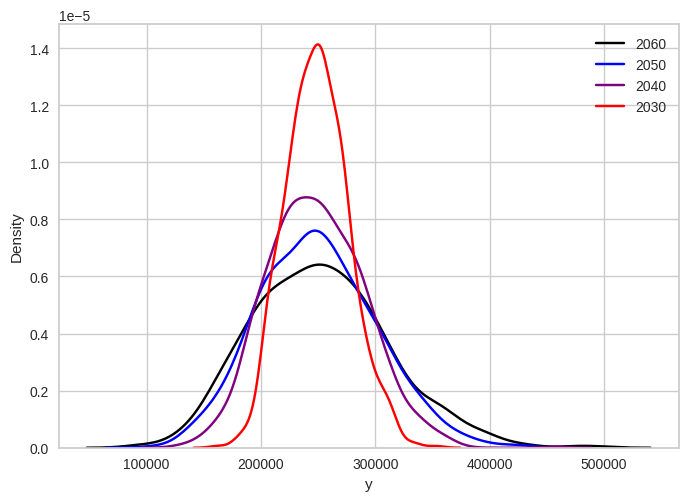

In [33]:
import seaborn as sns
sns.distplot(data_time37.y, hist = False, label = "2060", color = "black")
sns.distplot(data_time27.y, hist = False, label = "2050", color = "blue")
sns.distplot(data_time17.y, hist = False, label = "2040", color = "purple")
sns.distplot(data_time7.y, hist = False, label = "2030", color = "red")
plt.legend()
plt.show()

# TSNE

In [35]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [36]:
from sklearn.manifold import TSNE

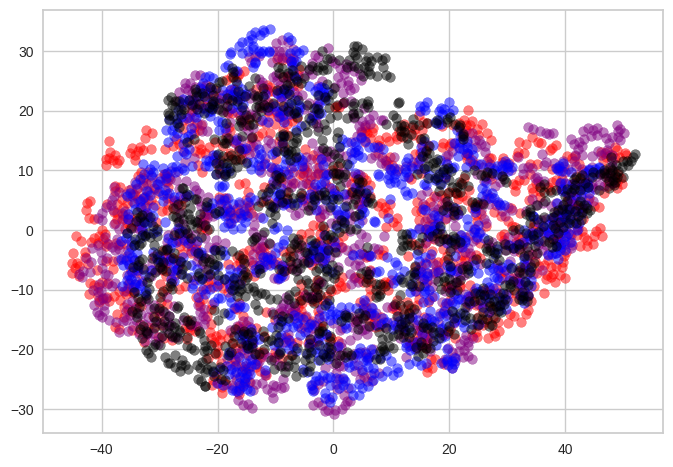

In [40]:
x_data_time7 = data_time7[['x0','x1','x2','x3','x4','x5','x6','x7','x8']]
x_data_time17 = data_time17[['x0','x1','x2','x3','x4','x5','x6','x7','x8']]
x_data_time27 = data_time27[['x0','x1','x2','x3','x4','x5','x6','x7','x8']]
x_data_time37 = data_time37[['x0','x1','x2','x3','x4','x5','x6','x7','x8']]
# x_data_time47 = data_time47[['x0','x1','x2','x3','x4','x5','x6','x7','x8']]

tsne_np = TSNE(n_components=2, random_state=42).fit_transform(x_data_time7)
tsne_np1 = TSNE(n_components=2, random_state=42).fit_transform(x_data_time17)
tsne_np2 = TSNE(n_components=2, random_state=42).fit_transform(x_data_time27)
tsne_np3 = TSNE(n_components=2, random_state=42).fit_transform(x_data_time37)
tsne_df = pd.DataFrame(tsne_np, columns=['component 0', 'component 1'])
tsne_df1 = pd.DataFrame(tsne_np1, columns=['component 0', 'component 1'])
tsne_df2 = pd.DataFrame(tsne_np2, columns=['component 0', 'component 1'])
tsne_df3 = pd.DataFrame(tsne_np3, columns=['component 0', 'component 1'])
plt.scatter(tsne_df['component 0'], tsne_df['component 1'], color = "red", alpha = 0.5)
plt.scatter(tsne_df1['component 0'], tsne_df1['component 1'], color = "purple", alpha = 0.5)
plt.scatter(tsne_df2['component 0'], tsne_df2['component 1'], color = "blue", alpha = 0.5)
plt.scatter(tsne_df3['component 0'], tsne_df3['component 1'], color = "black", alpha = 0.5)
plt.show()